<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

This is a very simple example. I will do the following things:
* read my dataset with Python
* do a factor analysis, rotate the factor loads and create the new variables
* loads this new dataset into Python

In [1]:
import pandas as pd
import ipystata

In [2]:
df=pd.read_csv('stata_example.csv',index_col=0)
df.head(1)

,population,h0,h1,h2,h3,h4,h5,h6,h7,h8,...,h22,h23,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,n_rest
170310101001,579,776,757,732,715,682,695,917,1039,1048,...,858,823,1804,1847,1671,1453,1607,1661,1480,2


In [3]:
df.columns

Index(['population', 'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8',
       'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18',
       'h19', 'h20', 'h21', 'h22', 'h23', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'n_rest'],
      dtype='object')

In [4]:
%%stata  -d df -np -o df2
/* "-d df" sends the dataframe "df" in the Stata session */
/* "-np" prevents any output from being shown below the cell (usefull once you're sure of your code) */
/* "-o df2" loads the dataset into a pandas dataframe named "df2" */
factor ///
h0 h1 h2 h3 h4 h5 h6 h7 h8 h9 h10 h11 h12 h13 h14 h15 h16 h17 h18 h19 h20 h21 h22 h23 ///
Monday Tuesday Wednesday Thursday Friday Saturday Sunday, pcf mineigen(.1)

rotate

predict X1 X2 X3 X4 X5

In [5]:
df2.columns

Index(['population', 'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8',
       'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18',
       'h19', 'h20', 'h21', 'h22', 'h23', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'n_rest', 'X1', 'X2', 'X3',
       'X4', 'X5'],
      dtype='object')

In [6]:
%%stata -os
/* This will open a new windows with the stata documentation */
help factor

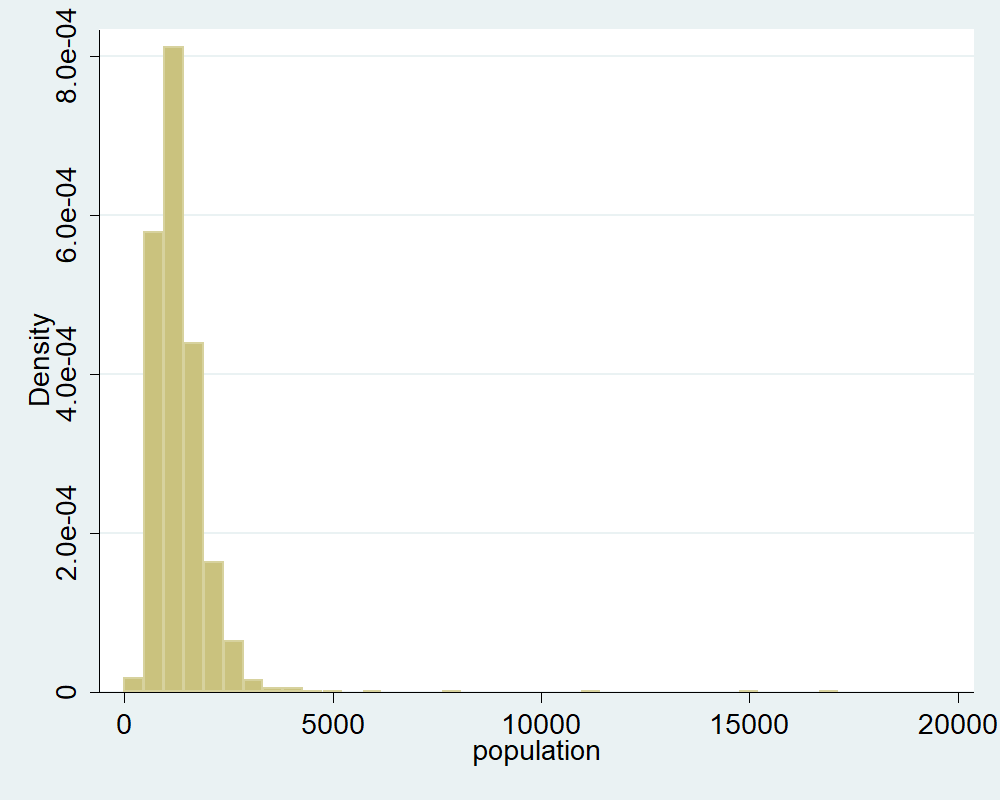

In [7]:
%%stata
/* plot a SINGLE graph is also very easy */
hist population

In [8]:
%%stata -os 
/* it will open stata with the current session */

<div style="text-align: right"> Yann Miquel, 2019 </div>